In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [5]:
titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("No. of passengers :",len(titanic))

No. of passengers : 891


<Axes: xlabel='Survived', ylabel='count'>

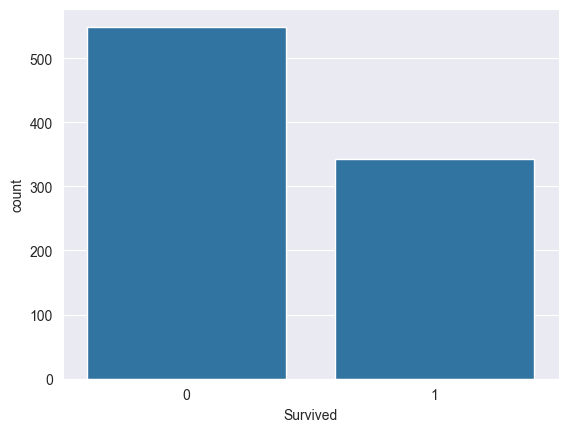

In [7]:
##ANALYZE THE DATA
sns.countplot(x="Survived" ,data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

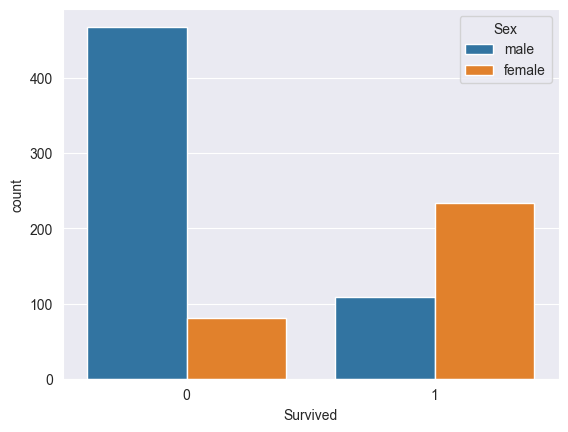

In [8]:
sns.countplot(x= "Survived" ,hue="Sex",data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

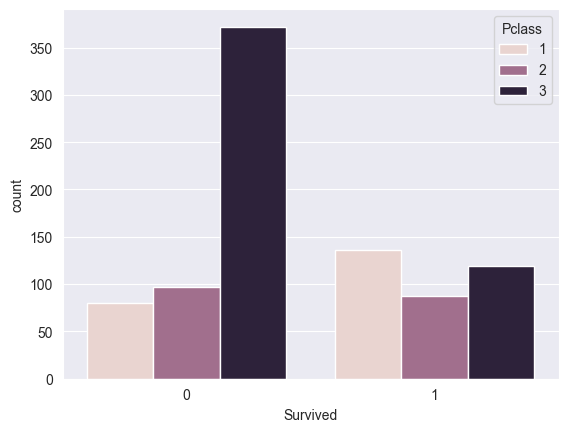

In [9]:
sns.countplot(x="Survived", hue ="Pclass",data=titanic)

<Axes: ylabel='Frequency'>

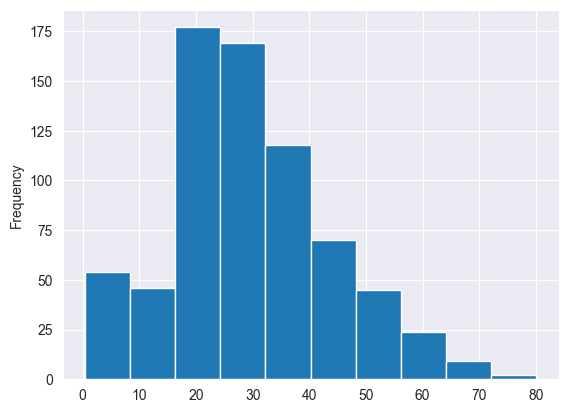

In [10]:
titanic["Age"].plot.hist()

<Axes: ylabel='Frequency'>

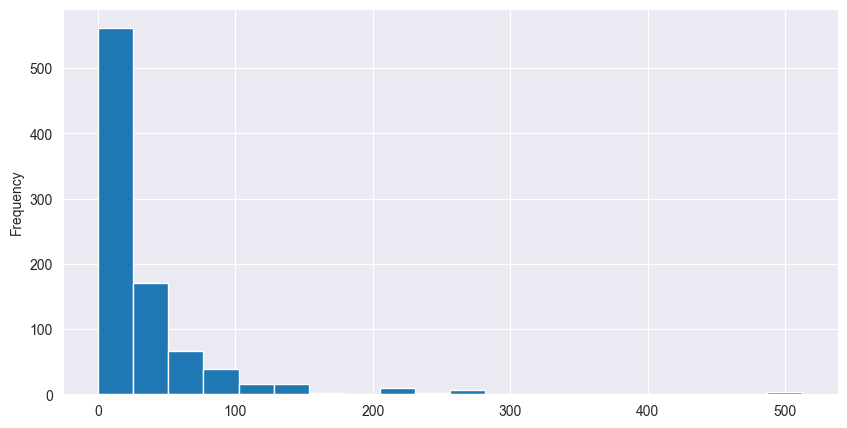

In [12]:
titanic["Fare"].plot.hist(bins=20 ,figsize=(10,5))

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

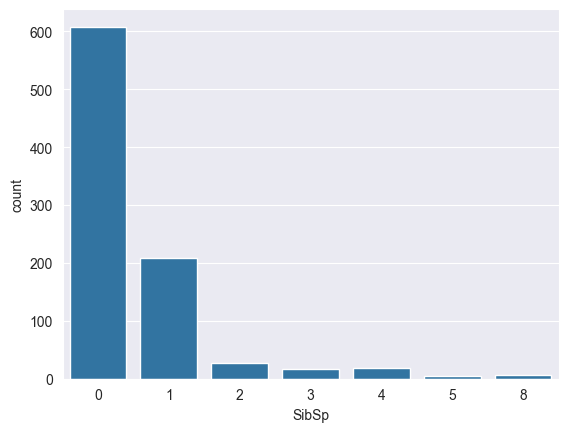

In [15]:
sns.countplot(x="SibSp",data=titanic)

In [6]:
##Data Wrangling : cleaning of data
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

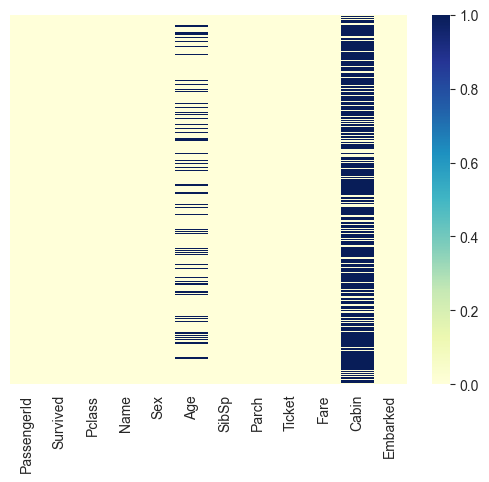

In [19]:
sns.heatmap(titanic.isnull(), yticklabels=False, cmap="YlGnBu")

<Axes: xlabel='Pclass', ylabel='Age'>

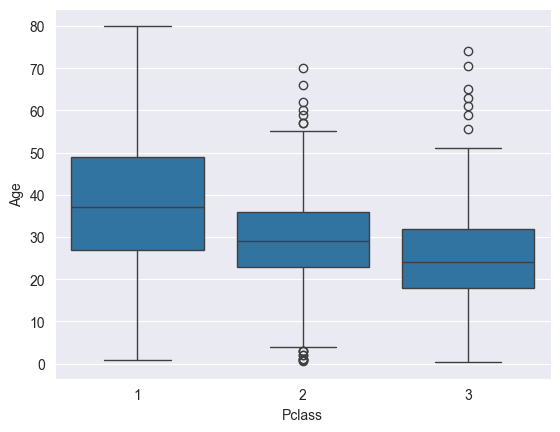

In [21]:
sns.boxplot(x="Pclass",y="Age",data=titanic)

In [28]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [8]:
titanic.dropna(inplace=True)
#remove null values

<Axes: >

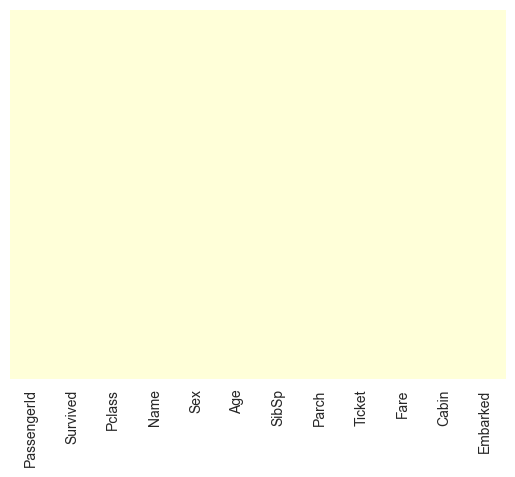

In [48]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")
#no null values

In [49]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
#Remove string va;uues for regression as it takes only 2 values
s=pd.get_dummies(titanic['Sex'], drop_first=True).astype(int)
s.head()

,male
1,0
3,0
6,1
10,0
11,0


In [10]:
pcl =pd.get_dummies(titanic["Pclass"],drop_first=True).astype(int)
pcl.head()

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [11]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True).astype(int)
embark.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [12]:
titanic = pd.concat([titanic, s, embark, pcl], axis=1)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0,0


In [13]:
titanic.drop(["Sex", "Cabin","Embarked","Pclass","PassengerId", "Name", "Ticket"], axis=1, inplace=True, errors='ignore')

titanic = titanic.round().astype(int)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,1,38,1,0,71,0,0,0,0,0
3,1,35,1,0,53,0,0,1,0,0
6,0,54,0,0,52,1,0,1,0,0
10,1,4,1,1,17,0,0,1,0,1
11,1,58,0,0,27,0,0,1,0,0


In [14]:
x = titanic.drop('Survived', axis=1)
y = titanic['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
# Convert all column names to strings to avoid mixed types
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Now train the logistic regression model
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train, y_train)



LogisticRegression(max_iter=10000)

In [15]:
predictions = logmodel.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.57      0.47      0.52        17\n           1       0.78      0.84      0.81        38\n\n    accuracy                           0.73        55\n   macro avg       0.68      0.66      0.66        55\nweighted avg       0.72      0.73      0.72        55\n'

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 8  9]
 [ 6 32]]


In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7272727272727273
